In [1]:
##notebook exploración

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("data/meteo/nl1.xlsx")
df.head(15)

,Site Characteristics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Country,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
1,Station,"Wageningen, Location Haarweg",NaN,NaN,NaN,NaN,NaN,NaN
2,Description,Observed data from Station Haarweg in Wageningen,NaN,NaN,NaN,NaN,NaN,NaN
3,Source,"Meteorology and Air Quality Group, Wageningen ...",NaN,NaN,NaN,NaN,NaN,NaN
4,Contact,Peter Uithol,NaN,NaN,NaN,NaN,NaN,NaN
5,Missing values,-999,NaN,NaN,NaN,NaN,NaN,NaN
6,Longitude,Latitude,Elevation,AngstromA,AngstromB,HasSunshine,NaN,NaN
7,5.67,51.97,7,0.18,0.55,False,NaN,NaN
8,Observed data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH


In [4]:
df = pd.read_excel("data/meteo/nl1.xlsx", header=9)

In [5]:
# Renombrar columnas manualmente
df.columns = ['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOWDEPTH']

# Eliminar la fila con las unidades (que viene justo después del encabezado)
df = df[pd.to_datetime(df['DAY'], errors='coerce').notna()]

# Convertir 'DAY' a datetime y poner como índice
df['DAY'] = pd.to_datetime(df['DAY'])
df.set_index('DAY', inplace=True)

# Reemplazar -999 por valores nulos
df.replace(-999, pd.NA, inplace=True)

/tmp/ipykernel_5203/208793832.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['DAY'], errors='coerce').notna()]
/tmp/ipykernel_5203/208793832.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(-999, pd.NA, inplace=True)


In [6]:
# Mostrar primeras filas y resumen estadístico
display(df.head())
print("Columnas:", df.columns.tolist())
display(df.describe())

,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
DAY,,,,,,,
2004-01-01,<NA>,-0.7,1.1,0.55,3.6,0.5,<NA>
2004-01-02,3888,-7.5,0.9,0.44,3.1,0.0,<NA>
2004-01-03,2074,-6.8,-0.5,0.45,1.8,0.0,<NA>
2004-01-04,1814,-3.6,5.9,0.66,3.2,2.5,<NA>
2004-01-05,1469,3.0,5.7,0.78,2.3,1.3,<NA>


Columnas: ['IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOWDEPTH']


,TMIN,TMAX,VAP,WIND,RAIN
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,6.366776,14.819157,1.124636,2.833443,2.370498
std,5.740977,7.283314,0.409573,1.391731,4.582169
min,-16.300000,-3.300000,0.100000,0.600000,0.000000
25%,2.250000,9.100000,0.800000,1.800000,0.000000
50%,6.600000,15.200000,1.070000,2.600000,0.100000
75%,10.800000,20.200000,1.430000,3.550000,2.800000
max,21.300000,35.900000,2.618000,9.900000,50.400000


In [7]:
# Eliminar la columna 'SNOWDEPTH' del DataFrame
df = df.drop(columns=["SNOWDEPTH"])
# Mostrar nuevamente las columnas disponibles para confirmar
df.columns.tolist()

['IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN']

In [ ]:
df.to_csv("data/meteo/df_amb.csv", index=True)

In [13]:
df.isna().sum()

IRRAD    1
TMIN     0
TMAX     0
VAP      0
WIND     0
RAIN     0
dtype: int64

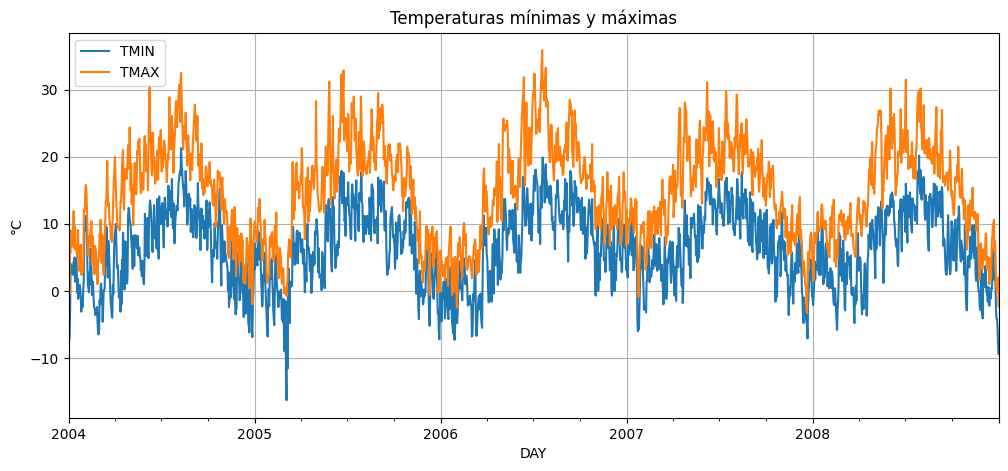

In [8]:
# Graficar temperaturas mínimas y máximas
plt.figure(figsize=(12, 5))
df['TMIN'].plot(label='TMIN')
df['TMAX'].plot(label='TMAX')
plt.title("Temperaturas mínimas y máximas")
plt.ylabel("°C")
plt.grid(True)
plt.legend()
plt.show()

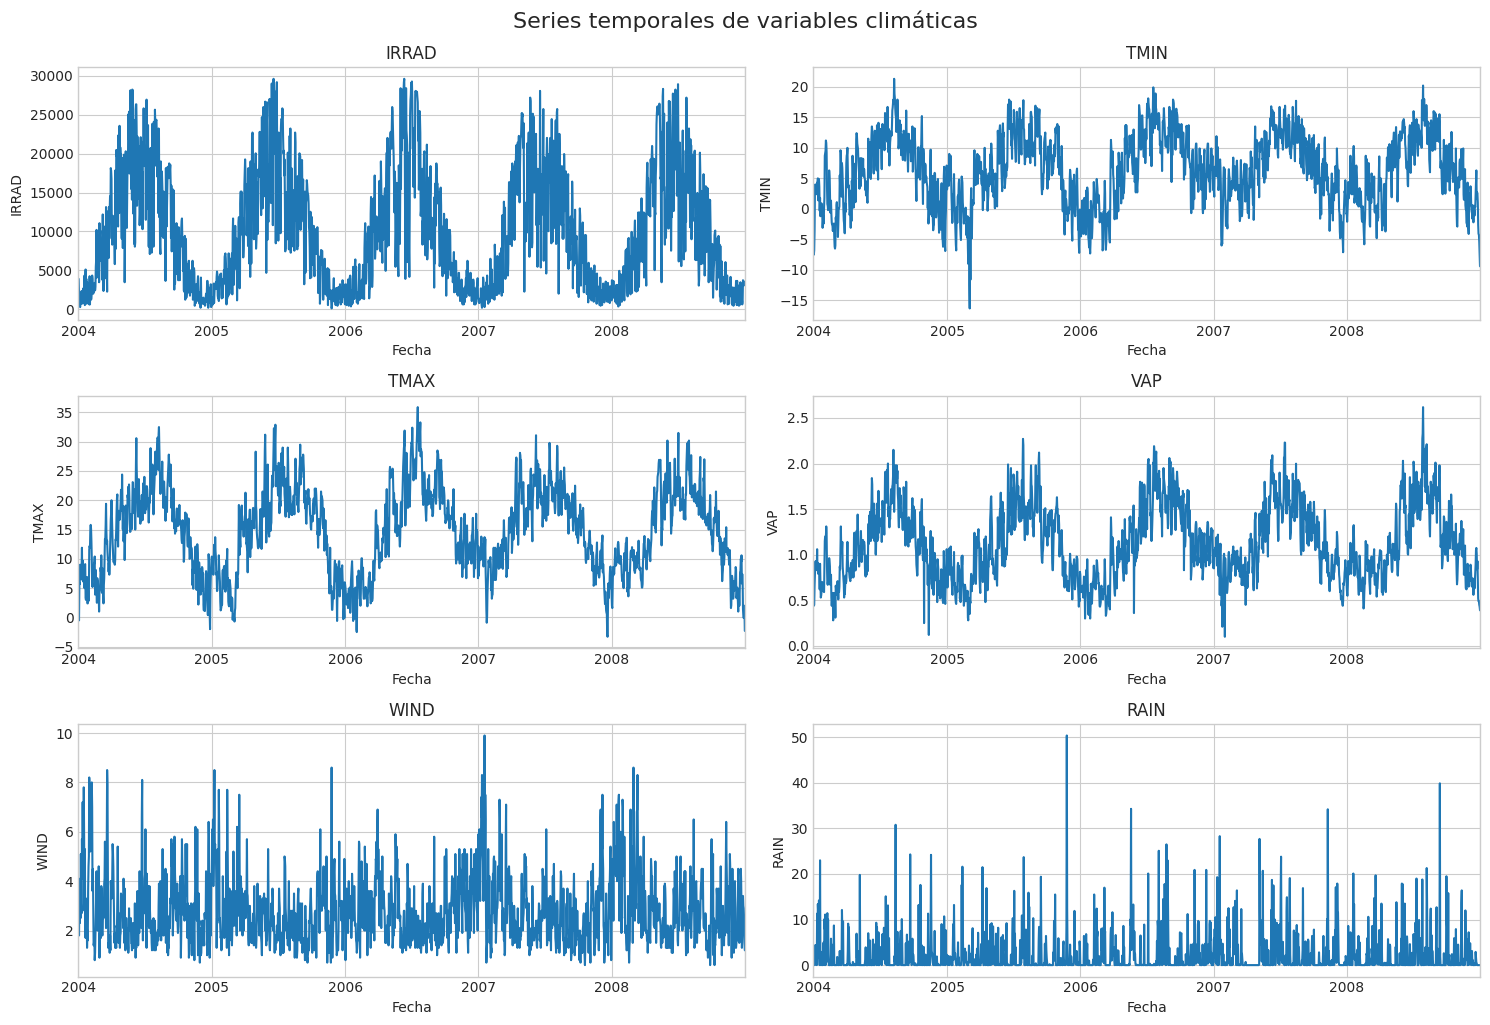

In [10]:
# Convertir cada columna a float de forma segura
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ahora graficamos
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.flatten()

variables = ['IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN']

for i, var in enumerate(variables):
    df[var].plot(ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.suptitle("Series temporales de variables climáticas", fontsize=16, y=1.02)
plt.show()


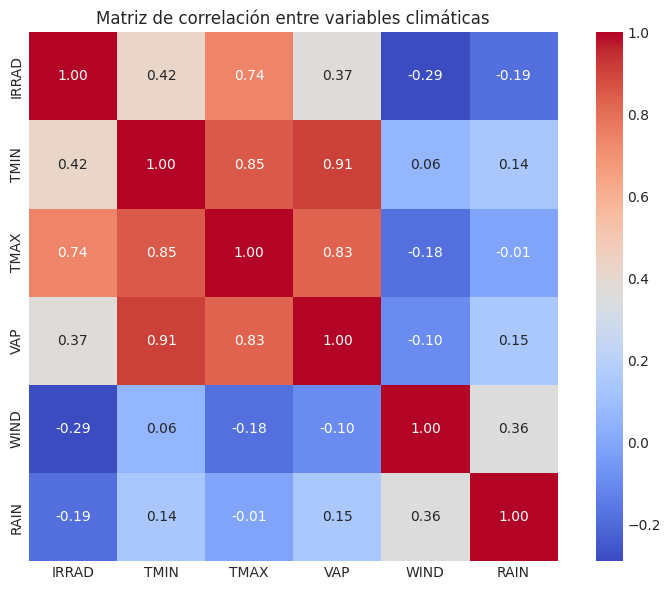

In [11]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Visualizar con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación entre variables climáticas")
plt.tight_layout()
plt.show()

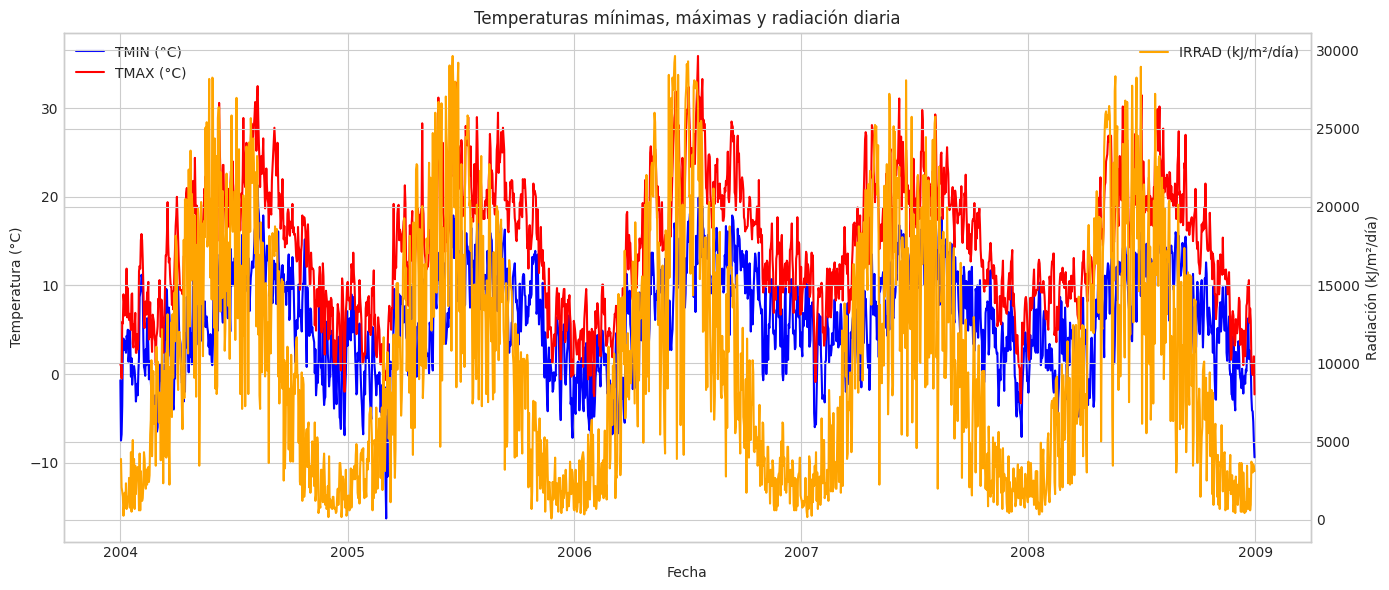

In [12]:
# Asegurarse de que IRRAD también esté en formato numérico
df['IRRAD'] = pd.to_numeric(df['IRRAD'], errors='coerce')

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primer eje: temperaturas
ax1.plot(df.index, df['TMIN'], label='TMIN (°C)', color='blue')
ax1.plot(df.index, df['TMAX'], label='TMAX (°C)', color='red')
ax1.set_ylabel("Temperatura (°C)")
ax1.set_xlabel("Fecha")
ax1.legend(loc='upper left')
ax1.grid(True)

# Segundo eje: irradiación
ax2 = ax1.twinx()
ax2.plot(df.index, df['IRRAD'], label='IRRAD (kJ/m²/día)', color='orange')
ax2.set_ylabel("Radiación (kJ/m²/día)")
ax2.legend(loc='upper right')

plt.title("Temperaturas mínimas, máximas y radiación diaria")
plt.tight_layout()
plt.show()


In [14]:
print(df["WIND"].mean())

2.8334428024083196
